https://archive.ics.uci.edu/static/public/468/data.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


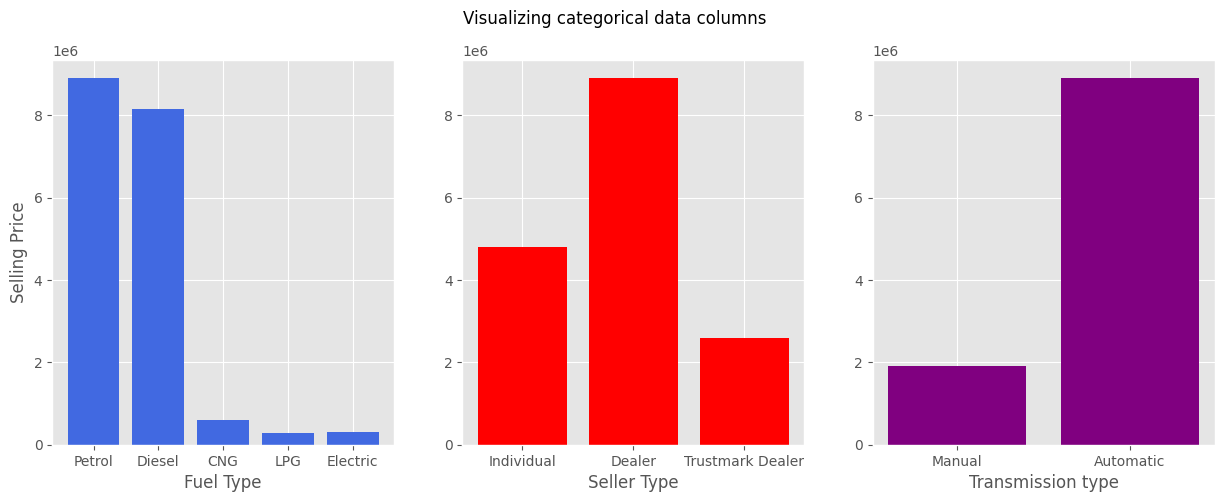

KeyError: 'Fuel_Type'

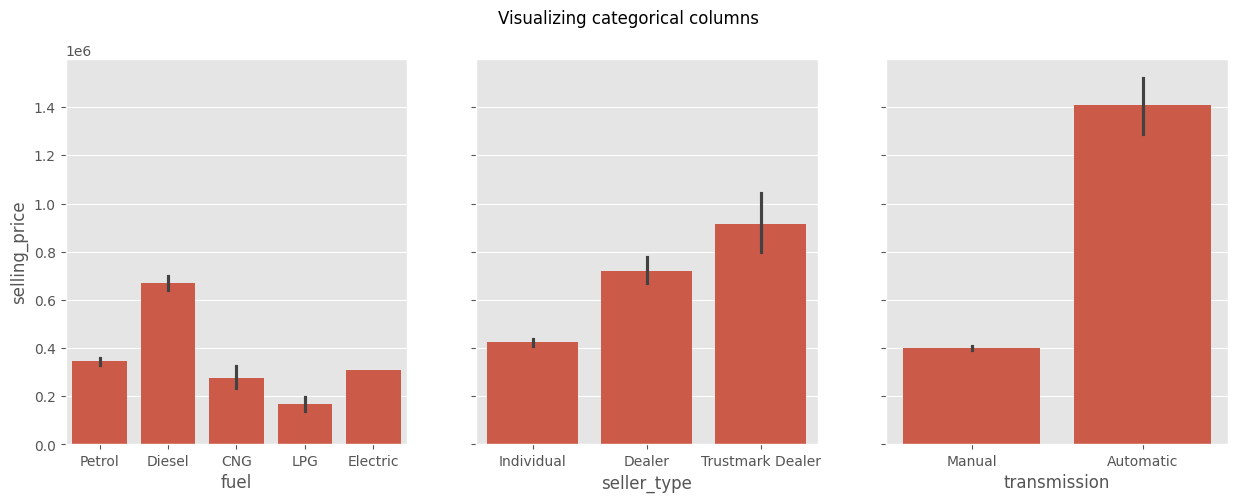

In [ ]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

car_data = pd.read_csv('car.csv')

car_data.head()

car_data.info()

car_data.isnull().sum()

car_data.describe()
car_data.columns
print(car_data['fuel'].value_counts())
print(car_data['seller_type'].value_counts())
print(car_data['transmission'].value_counts())
fuel_type = car_data['fuel']
seller_type = car_data['seller_type']
transmission_type = car_data['transmission']
selling_price = car_data['selling_price']

from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

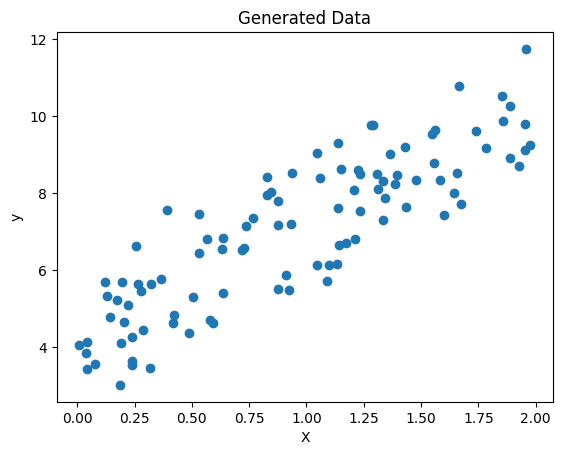

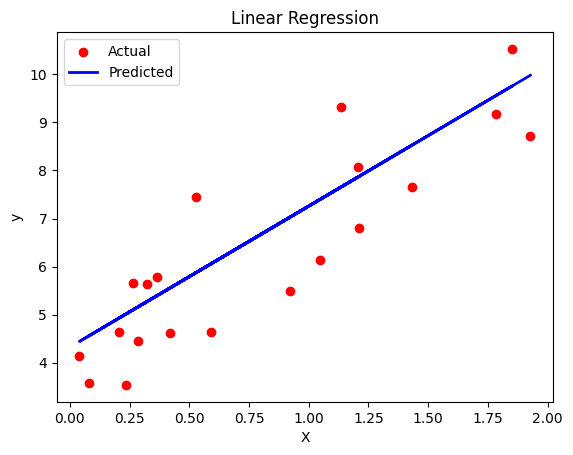

Mean Squared Error: 1.0434333815695171
R^2 Score: 0.7424452332071367
Coefficient: [[2.93647151]]
Intercept: [4.32235853]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv', delimiter=',')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify categorical variables and encode them
df_encoded = pd.get_dummies(df, drop_first=True)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# **Online Shoppers Purchasing Intention Dataset**





**Importing Required Libraries**

In this section, we import essential libraries needed for data manipulation, visualization, and machine learning:

pandas: Provides data structures and functions to manipulate and analyze structured data.

numpy: Supports numerical operations and array handling.

matplotlib.pyplot: Used for creating static, animated, and interactive visualizations in Python.

seaborn: Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

sklearn.model_selection: Contains functions for splitting data into training and testing sets.

sklearn.linear_model: Includes the LinearRegression class for fitting linear models.

sklearn.metrics: Provides functions to evaluate the performance of machine learning models, including calculating mean squared error and R-squared score.

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


**Attribute Information:**

The dataset consists of 10 numerical and 8 categorical attributes.

Administrative               int64

Administrative_Duration    float64

Informational                int64

Informational_Duration     float64

ProductRelated               int64

ProductRelated_Duration    float64

BounceRates                float64

ExitRates                  float64

PageValues                 float64

SpecialDay                 float64

Month                       object

OperatingSystems             int64

Browser                      int64

Region                       int64

TrafficType                  int64

VisitorType                 object

Weekend                       bool

Revenue                       bool

In [ ]:
df.dtypes

,0
Ratings,float64
RAM,float64
ROM,float64
Mobile_Size,float64
Primary_Cam,int64
Selfi_Cam,float64
Battery_Power,int64
Price,int64


Importing the dataset

In [ ]:
# Load the dataset with comma delimiter
df = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv', delimiter=',')

df.head()


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


**Text Cleaning and Preprocessing**

This step removes any extra spaces that might be present at the beginning or end of column names in the Data

In [ ]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()
print("Column names:", df.columns.tolist())

# Identify categorical variables and encode them
df_encoded = pd.get_dummies(df, drop_first=True)

Column names: ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']


**Defining Features and Target Variable**

In this section, we are preparing the data for machine learning by defining the features (independent variables) and the target variable (dependent variable). The target variable is what we want to predict, while the features are the input variables used to make predictions.

In [ ]:
# Define features and target variable after encoding
target_column = 'Price'
X = df.drop('Price', axis=1)
y = df['Price']

**Splitting the Dataset into Training and Testing Sets**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing and Training the Linear Regression Model**

Training the model involves finding the best-fit line (or hyperplane in higher dimensions) that minimizes the difference between the predicted and actual target values in the training set. This enables the model to make predictions on new, unseen data.



In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

**Evaluating the Model's Performance**

In this step, we evaluate how effectively the trained linear regression model predicts the target variable by calculating key performance metrics:

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial features (optional, if you suspect non-linearity)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = Ridge(alpha=1.0)  # You can also use Lasso(alpha=1.0) or LinearRegression() without regularization
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Cross-validation score
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Mean Squared Error: 188196334.52062252
R-squared: 0.5543723657786463
Cross-validated MSE: 204603866.80941617


**Visualizing Model Results**

In this step, we create visualizations to assess the performance of the linear regression model and understand the distribution of errors:

1.Scatter Plot of Actual vs. Predicted Values

2.Histogram of Residuals

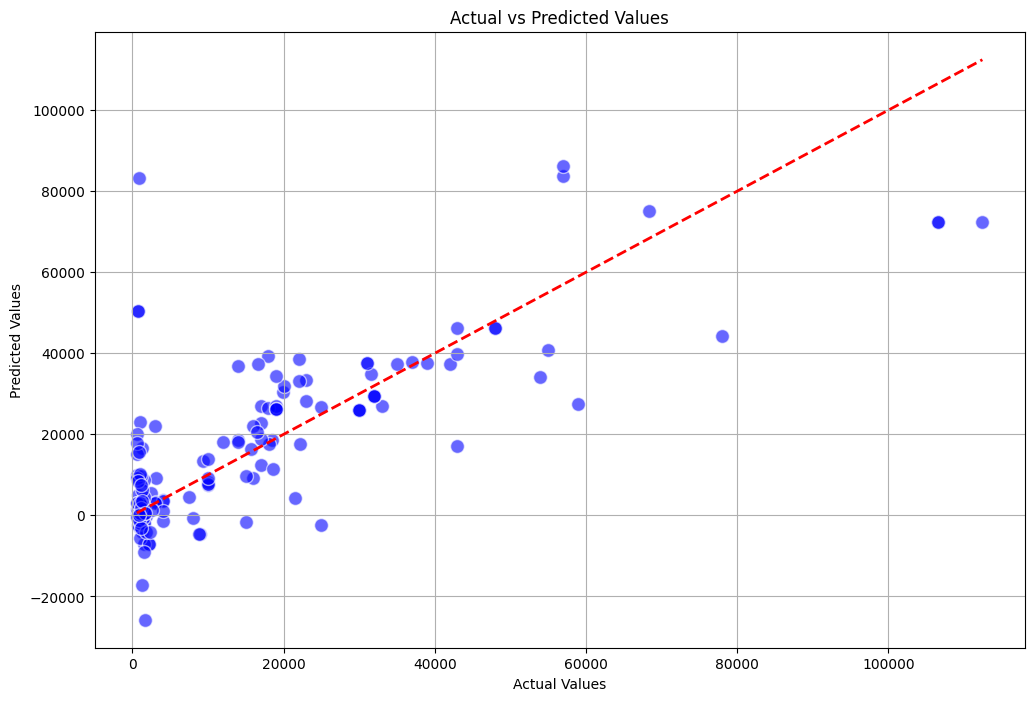

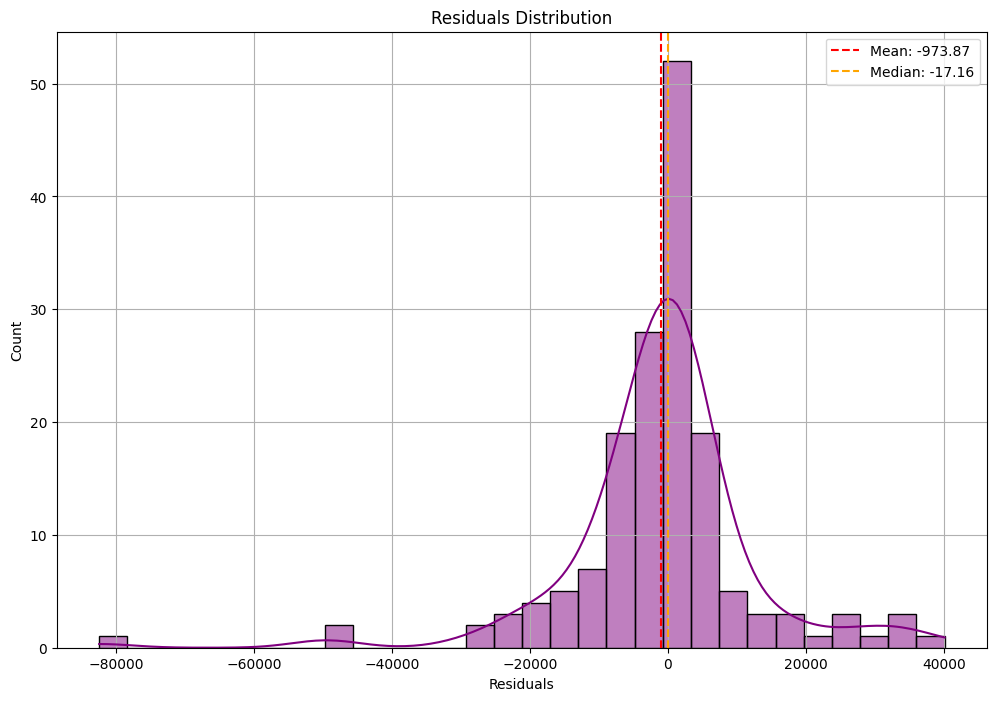

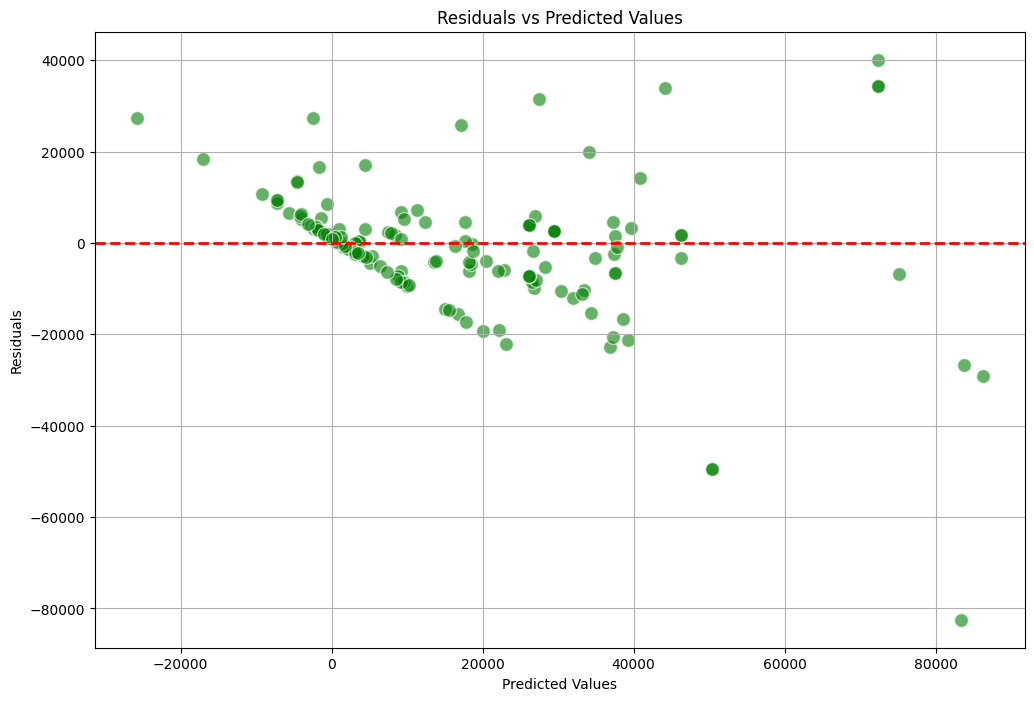

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=100, c='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# 2. Residuals Distribution
residuals = y_test - y_pred

plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.axvline(x=residuals.mean(), color='r', linestyle='--', label=f'Mean: {residuals.mean():.2f}')
plt.axvline(x=np.median(residuals), color='orange', linestyle='--', label=f'Median: {np.median(residuals):.2f}')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.legend()
plt.grid(True)
plt.show()


# 3. Residuals vs Predicted Values
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w', s=100, c='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()